<a href="https://colab.research.google.com/github/negiamishhu/DL-and-ML-fusion-for-skin-disease-detection/blob/main/MobileNET_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-layer-normalization
!pip install keras

  Preparing metadata (setup.py) ... done
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=cd84f18b39d3f699c4763b5f2d1786ecd1a012fb83d412a36bd7e5376876ab08
  Stored in directory: /root/.cache/pip/wheels/ed/3a/4b/21db23c0cc56c4b219616e181f258eb7c57d36cc5d056fae9a
Successfully built keras-layer-normalization


#TRAIN MOBILENET AND THEN USE XGBOOST

In [ ]:
# prompt: gdrive mount code

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
#from keras_layer_normalization import BatchNormalization
import os
import seaborn as sns

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# Path to the directory containing folders of images
images_dir = "/content/drive/MyDrive/natural/train"

# Create lists to store image arrays (X) and labels (Y)
#SIZE = 128
SIZE = 224
train_images = []
train_labels = []

# Loop through each folder in the directory
for folder in os.listdir(images_dir):
    folder_path = os.path.join(images_dir, folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            #print(image_path)
            # Check if the item in the folder is a file and is an image
            if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read image as array
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (SIZE,SIZE))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                train_images.append(img)
                train_labels.append(folder)

train_images = np.array(train_images)
train_labels = np.array(train_labels)



print(train_labels)


['bkl' 'bkl' 'bkl' ... 'vasc' 'vasc' 'vasc']


In [ ]:
# Path to the directory containing folders of images
images_dir = "/content/drive/MyDrive/natural/test"

# Create lists to store image arrays (X) and labels (Y)
#SIZE = 128
SIZE = 224
test_images = []
test_labels = []

# Loop through each folder in the directory
for folder in os.listdir(images_dir):
    folder_path = os.path.join(images_dir, folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Check if the item in the folder is a file and is an image
            if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read image as array
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (SIZE,SIZE))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                test_images.append(img)
                test_labels.append(folder)

test_images = np.array(test_images)
test_labels = np.array(test_labels)



print(test_labels)

['nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'bcc' 'bcc' 'bcc'
 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'b

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network.
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assume you have preloaded 'images' and 'labels'
'''
# Preprocess the images
images = images / 255.0  # Normalize to [0, 1]
labels = to_categorical(labels, num_classes=7)  # Convert labels to one-hot encoding

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
'''
# Create the MobileNetV3 model
def create_model():
    base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(7, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

# Set up checkpoint to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=500, batch_size=32, validation_data=(x_test, y_test_one_hot), callbacks=[checkpoint])


4334752/4334752 [==============================] - 0s 0us/step
Epoch 1/500
40/40 [==============================] - ETA: 0s - loss: 1.9855 - accuracy: 0.1623
Epoch 1: val_accuracy improved from -inf to 0.14286, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 28s 601ms/step - loss: 1.9855 - accuracy: 0.1623 - val_loss: 2.0460 - val_accuracy: 0.1429
Epoch 2/500
40/40 [==============================] - ETA: 0s - loss: 1.9830 - accuracy: 0.1551
Epoch 2: val_accuracy did not improve from 0.14286
40/40 [==============================] - 21s 541ms/step - loss: 1.9830 - accuracy: 0.1551 - val_loss: 1.9800 - val_accuracy: 0.1429
Epoch 3/500
40/40 [==============================] - ETA: 0s - loss: 1.9552 - accuracy: 0.1575
Epoch 3: val_accuracy did not improve from 0.14286
40/40 [==============================] - 19s 484ms/step - loss: 1.9552 - accuracy: 0.1575 - val_loss: 1.9678 - val_accuracy: 0.1400
Epoch 4/500
40/40 [==============================] - ETA: 0s - loss: 1.9490 - accuracy: 0.1392
Epoch 4: val_accuracy improved from 0.14286 to 0.16857, saving model to best_model.h5
40/40 [==============================] - 18s 461ms/step - loss: 1.9490 - accuracy: 0.1392 - val_loss: 1.9785 - val_accuracy: 0.1686

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import xgboost as xgb
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# Load the best model
model = load_model('best_model.h5')

# Modify the model to use it as a feature extractor
model = Model(inputs=model.input, outputs=model.layers[-3].output)

# Extract features from the training and validation data
X_train_features = model.predict(x_train)
X_val_features = model.predict(x_test)

model_2 = xgb.XGBClassifier()
model_2.fit(X_train_features, y_train)
#Now predict using the trained RF model.
prediction_RF = model_2.predict(X_val_features)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)
'''
X_test_feature = MobileNetV3_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
# Train the XGBoost classifier

# Train XGBoost on the extracted features
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', num_class=7)
xgb_classifier.fit(X_train_features, np.argmax(y_train, axis=0))  # Use np.argmax to convert one-hot to labels

# Evaluate the classifier
predictions = xgb_classifier.predict(X_val_features)
accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print("Accuracy of XGBoost classifier on extracted features:", accuracy)
'''

11/11 [==============================] - 7s 618ms/step


'\nX_test_feature = MobileNetV3_model.predict(x_test)\nX_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)\n# Train the XGBoost classifier\n\n# Train XGBoost on the extracted features\nxgb_classifier = xgb.XGBClassifier(objective=\'multi:softprob\', num_class=7)\nxgb_classifier.fit(X_train_features, np.argmax(y_train, axis=0))  # Use np.argmax to convert one-hot to labels\n\n# Evaluate the classifier\npredictions = xgb_classifier.predict(X_val_features)\naccuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)\nprint("Accuracy of XGBoost classifier on extracted features:", accuracy)\n'

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'X_test_features' is not defined

In [ ]:
prediction_RF = model_2.predict(X_val_features)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.7057142857142857


1/1 [==============================] - 0s 42ms/step
The prediction for this image is:  ['mel']
The actual label for this image is:  mel


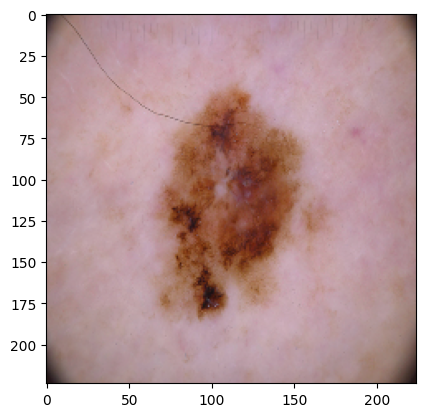

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model_2.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

              precision    recall  f1-score   support

       akiec       0.69      0.74      0.71        50
         bcc       0.61      0.66      0.63        50
         bkl       0.62      0.48      0.54        50
          df       0.89      1.00      0.94        50
         mel       0.60      0.56      0.58        50
          nv       0.66      0.50      0.57        50
        vasc       0.81      1.00      0.89        50

    accuracy                           0.71       350
   macro avg       0.69      0.71      0.70       350
weighted avg       0.69      0.71      0.70       350

[[37  7  4  0  1  1  0]
 [ 8 33  1  2  2  3  1]
 [ 3  8 24  2  7  4  2]
 [ 0  0  0 50  0  0  0]
 [ 5  3  5  0 28  5  4]
 [ 1  3  5  2  9 25  5]
 [ 0  0  0  0  0  0 50]]
1/1 [==============================] - 0s 39ms/step
The prediction for this image is:  ['mel']
The actual label for this image is:  mel


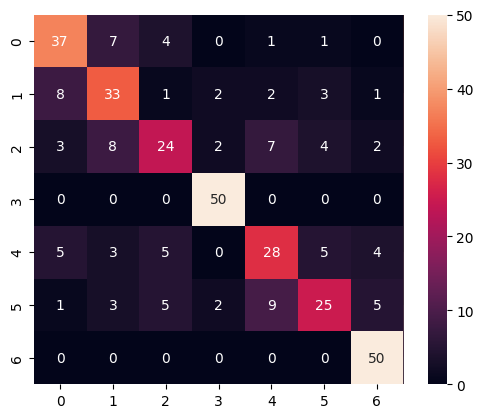

In [ ]:
#Print overall accuracy
#from sklearn import metrics
#print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)
# Generate a classification report
report = classification_report(test_labels, prediction_RF)

print(report)
print(confusion_matrix(test_labels, prediction_RF))

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model_2.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])